In [1]:
import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# Nicehash (btc)
x_init_nh = 8.901e-4
r_nh_day= 1.547e-5

# Brave (bat)
# 3.5 bat: Francesca, 3.5 bat: Manuel (cellulare), 2 bat Manuel (pc), 1 bat (Loredana, Angela, Pedro)
x_init_br = 2.80 + 2.5 + 4.5
r_br_month = 10.

# Coinbase (usd coin)
x = 108.4 + 60.6

init = {'NH': x_init_nh, 'BR': x_init_br}
r = {'NH': r_nh_day * 30, 'BR': r_br_month}

In [3]:
# Defining Binance API URL
key = "https://api.binance.com/api/v3/ticker/price?symbol="
  
# Making list for multiple crypto's
currencies = ["BTCUSDT", "BATUSDT"]

conversions = {}
# running loop to print all crypto prices
for curr in currencies:
    # completing API for request
    url = key + curr
    data = requests.get(url)
    data = data.json()
    if curr == 'BTCUSDT':
        conversions['NH'] = float(data['price'])
    else:
        conversions['BR'] = float(data['price'])
    print(f"{data['symbol']} price is {data['price']}")

BTCUSDT price is 47190.45000000
BATUSDT price is 0.92650000


In [4]:
URL = "https://coinmarketcap.com/it/currencies/tether/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

results = soup.find(id="__next")
price_els = results.find_all("div", class_="priceValue")
# [<div class="priceValue"><span>€0.9016</span></div>]
USDT_EUR = float(price_els[0].text.split('€')[-1])

print(f'USDT to EUR: €{round(USDT_EUR, 2)}')

USDT to EUR: €0.9


In [5]:
def earnings(n_months):
    return sum(n_months * r[key] * conversions[key] for key in r.keys())

n = 1
print(f'Earnings of {n} months: €{round(earnings(1) * USDT_EUR, 2)}') 

Earnings of 1 months: €28.09


In [6]:
s = sum(init[key] * conversions[key] for key in init.keys())
x_in = (x + s) * USDT_EUR 

print(f'Initial earn: €{round(x_in, 2)}')

Initial earn: €198.38


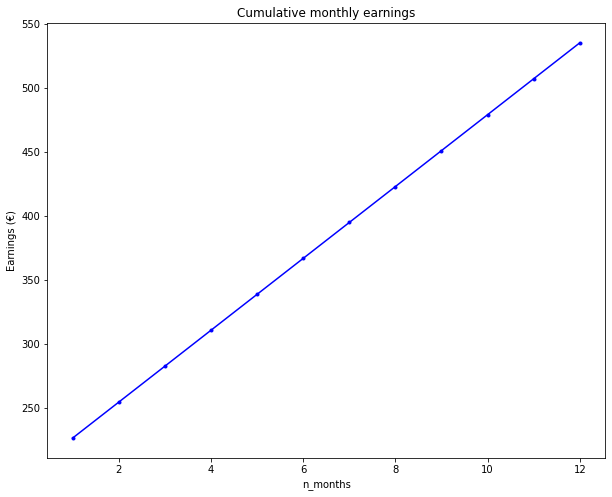

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), [x_in + earnings(i) * USDT_EUR for i in range(1, 13)], 'b.-')
plt.xlabel('n_months')
plt.ylabel('Earnings (€)')
plt.title("Cumulative monthly earnings");